In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.layers import Activation
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

# Data Pre-processing

In [4]:
# Read csv
df = pd.read_csv("../compiled.csv")

# Remove 5-tuple
new_df = df.iloc[:, 5:].copy()

# Replace "inf" with numpy.nan
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns containing numpy.nan
new_df = new_df.dropna()
# Dataset Info
print(new_df.shape)
print(new_df['Label'].value_counts())

# Normalise values
x = new_df.iloc[:,:-1].copy()
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
y = new_df["Label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

# Reshape
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train_cnn= to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y.value_counts())

(18697, 24)
Label
3    5611
5    5244
1    5071
2    1847
4     711
0     213
Name: count, dtype: int64
(13087, 23)
(13087,)
(5610, 23)
(5610,)
Label
3    5611
5    5244
1    5071
2    1847
4     711
0     213
Name: count, dtype: int64


In [33]:
# Confusion matrix 
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_pred, y_test)

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(6)
    plt.xticks(tick_marks, label_dict.values())
    plt.yticks(tick_marks, label_dict.values())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
# Dictionary to store results
results_dictionary = {}

# Labels Dictionary
label_dict = {
    0: "Chat",
    1: "Email",
    2: "File Transfer",
    3: "Streaming",
    4: "VoIP",
    5: "Gaming"
}

# Model Training

In [15]:
# Create the CNN Model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(128, 3, input_shape=(X_train.shape[1], 1), strides=1, activation = 'relu'))
# 2nd Convolution Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, activation = 'relu'))
# Max Pooling and Dropout Layer
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# 3rd Convolution Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, activation = 'relu'))
# 4th Convolution Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, activation = 'relu'))
#Max Pooling and Dropout Layer
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(y_test_cnn.shape[1], activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

model.fit(X_train_cnn, y_train_cnn, epochs = 200, validation_data = (X_test_cnn, y_test_cnn))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 21, 128)           512       
                                                                 
 conv1d_5 (Conv1D)           (None, 19, 128)           49280     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 9, 128)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 9, 128)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 7, 128)            49280     
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 128)            49280     
                                                      

Epoch 43/200
409/409 [==============================] - 5s 12ms/step - loss: 0.7797 - accuracy: 0.7236 - val_loss: 0.7770 - val_accuracy: 0.7217
Epoch 44/200
409/409 [==============================] - 5s 13ms/step - loss: 0.7779 - accuracy: 0.7227 - val_loss: 0.7736 - val_accuracy: 0.7228
Epoch 45/200
409/409 [==============================] - 5s 12ms/step - loss: 0.7748 - accuracy: 0.7258 - val_loss: 0.7654 - val_accuracy: 0.7323
Epoch 46/200
409/409 [==============================] - 6s 14ms/step - loss: 0.7679 - accuracy: 0.7275 - val_loss: 0.7706 - val_accuracy: 0.7239
Epoch 47/200
409/409 [==============================] - 6s 14ms/step - loss: 0.7697 - accuracy: 0.7227 - val_loss: 0.7721 - val_accuracy: 0.7344
Epoch 48/200
409/409 [==============================] - 5s 12ms/step - loss: 0.7695 - accuracy: 0.7262 - val_loss: 0.7596 - val_accuracy: 0.7292
Epoch 49/200
409/409 [==============================] - 5s 12ms/step - loss: 0.7679 - accuracy: 0.7227 - val_loss: 0.7707 - val_ac

409/409 [==============================] - 7s 17ms/step - loss: 0.7001 - accuracy: 0.7468 - val_loss: 0.7568 - val_accuracy: 0.7365
Epoch 100/200
409/409 [==============================] - 7s 18ms/step - loss: 0.7041 - accuracy: 0.7449 - val_loss: 0.7518 - val_accuracy: 0.7456
Epoch 101/200
409/409 [==============================] - 7s 18ms/step - loss: 0.7060 - accuracy: 0.7433 - val_loss: 0.7654 - val_accuracy: 0.7403
Epoch 102/200
409/409 [==============================] - 7s 18ms/step - loss: 0.6983 - accuracy: 0.7493 - val_loss: 0.7653 - val_accuracy: 0.7287
Epoch 103/200
409/409 [==============================] - 7s 17ms/step - loss: 0.7058 - accuracy: 0.7431 - val_loss: 0.7763 - val_accuracy: 0.7312
Epoch 104/200
409/409 [==============================] - 7s 17ms/step - loss: 0.7004 - accuracy: 0.7492 - val_loss: 0.7477 - val_accuracy: 0.7471
Epoch 105/200
409/409 [==============================] - 7s 16ms/step - loss: 0.6946 - accuracy: 0.7464 - val_loss: 0.7490 - val_accuracy:

409/409 [==============================] - 6s 15ms/step - loss: 0.6611 - accuracy: 0.7625 - val_loss: 0.7777 - val_accuracy: 0.7579
Epoch 156/200
409/409 [==============================] - 4s 11ms/step - loss: 0.6672 - accuracy: 0.7591 - val_loss: 0.7620 - val_accuracy: 0.7668
Epoch 157/200
409/409 [==============================] - 5s 13ms/step - loss: 0.6593 - accuracy: 0.7647 - val_loss: 0.7579 - val_accuracy: 0.7693
Epoch 158/200
409/409 [==============================] - 4s 11ms/step - loss: 0.6619 - accuracy: 0.7634 - val_loss: 0.7513 - val_accuracy: 0.7647
Epoch 159/200
409/409 [==============================] - 6s 15ms/step - loss: 0.6592 - accuracy: 0.7614 - val_loss: 0.7616 - val_accuracy: 0.7613
Epoch 160/200
409/409 [==============================] - 7s 16ms/step - loss: 0.6673 - accuracy: 0.7608 - val_loss: 0.7694 - val_accuracy: 0.7369
Epoch 161/200
409/409 [==============================] - 7s 17ms/step - loss: 0.6679 - accuracy: 0.7588 - val_loss: 0.7838 - val_accuracy:

176/176 [==============================] - 1s 4ms/step


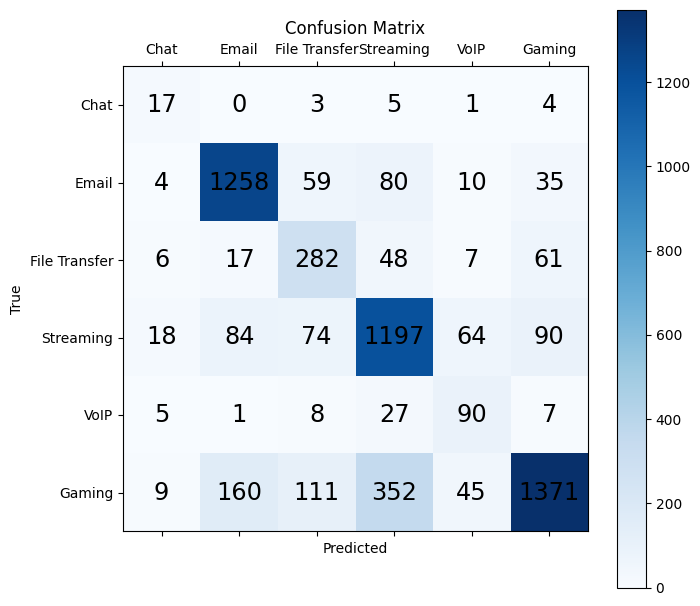

               precision    recall  f1-score   support

         Chat     0.5667    0.2881    0.3820        59
        Email     0.8700    0.8276    0.8483      1520
File Transfer     0.6698    0.5251    0.5887       537
    Streaming     0.7839    0.7004    0.7398      1709
         VoIP     0.6522    0.4147    0.5070       217
       Gaming     0.6694    0.8744    0.7583      1568

     accuracy                         0.7513      5610
    macro avg     0.7020    0.6051    0.6374      5610
 weighted avg     0.7569    0.7513    0.7471      5610



In [34]:
y_pred = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred, axis=1)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_test, y_pred, digits=4, target_names=label_dict.values()))

# Store Results
results_dictionary["CNN"] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

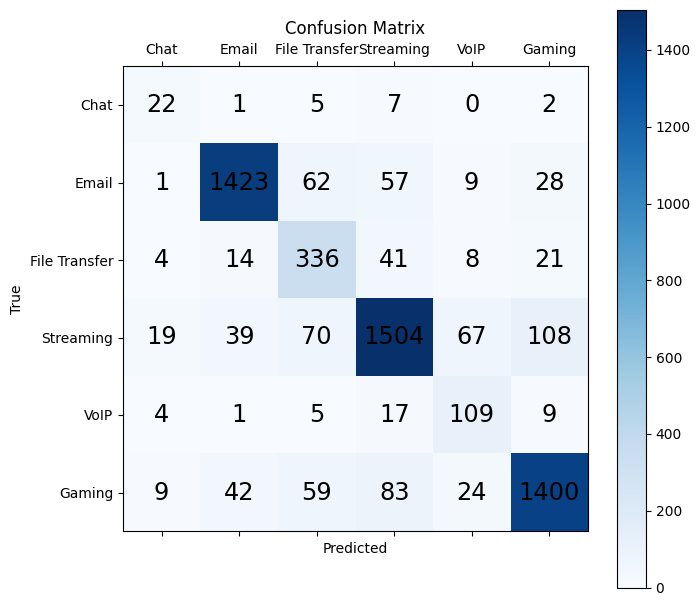

               precision    recall  f1-score   support

         Chat     0.5946    0.3729    0.4583        59
        Email     0.9006    0.9362    0.9181      1520
File Transfer     0.7925    0.6257    0.6993       537
    Streaming     0.8323    0.8800    0.8555      1709
         VoIP     0.7517    0.5023    0.6022       217
       Gaming     0.8658    0.8929    0.8791      1568

     accuracy                         0.8545      5610
    macro avg     0.7896    0.7017    0.7354      5610
 weighted avg     0.8508    0.8545    0.8501      5610



In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_test, y_pred, digits=4, target_names=label_dict.values()))

# Store Results
results_dictionary["RandomForest"] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

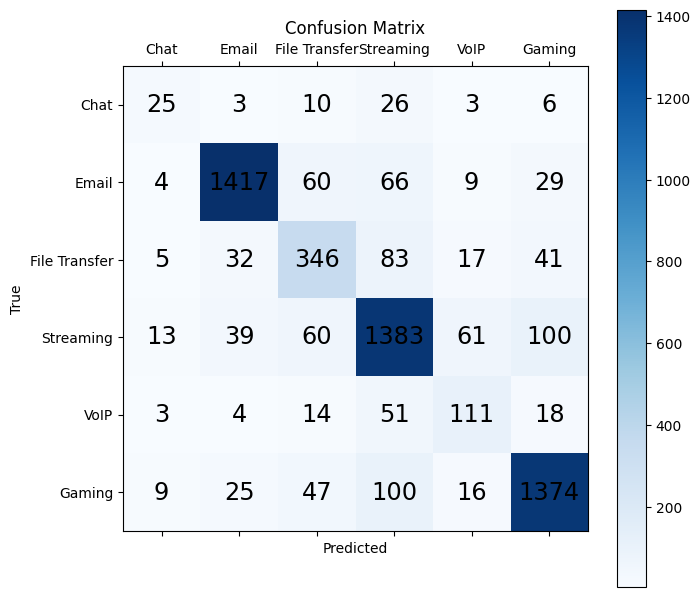

              precision    recall  f1-score   support

           0     0.4237    0.3425    0.3788        73
           1     0.9322    0.8940    0.9127      1585
           2     0.6443    0.6603    0.6522       524
           3     0.8092    0.8351    0.8220      1656
           4     0.5115    0.5522    0.5311       201
           5     0.8763    0.8746    0.8754      1571

    accuracy                         0.8299      5610
   macro avg     0.6996    0.6931    0.6954      5610
weighted avg     0.8317    0.8299    0.8305      5610



In [36]:
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(X_train, y_train)
y_pred = decision_tree_clf.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_pred, y_test, digits=4))

# Store results
results_dictionary["DecisionTree"] =  [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


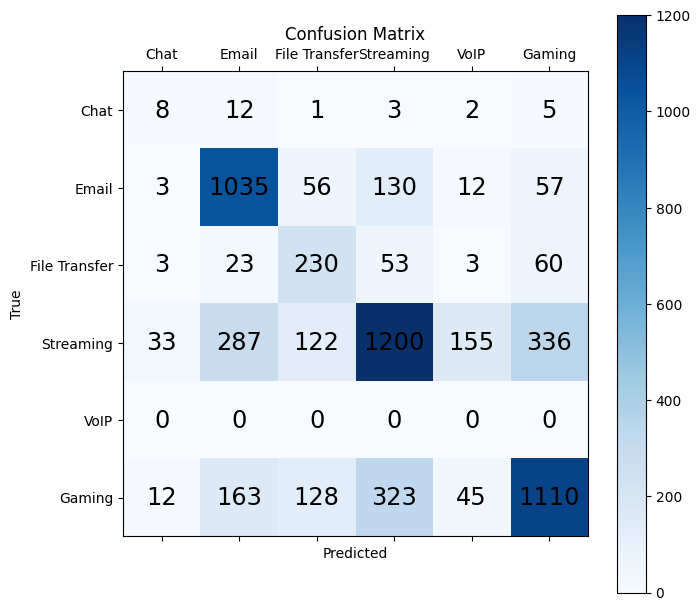

              precision    recall  f1-score   support

           0     0.1356    0.2581    0.1778        31
           1     0.6809    0.8005    0.7359      1293
           2     0.4283    0.6183    0.5061       372
           3     0.7022    0.5626    0.6247      2133
           4     0.0000    0.0000    0.0000         0
           5     0.7079    0.6232    0.6629      1781

    accuracy                         0.6387      5610
   macro avg     0.4425    0.4771    0.4512      5610
weighted avg     0.6778    0.6387    0.6521      5610



C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [37]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred = adaboost_clf.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_pred, y_test, digits=4))

# Store results
results_dictionary["AdaBoost"] =  [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


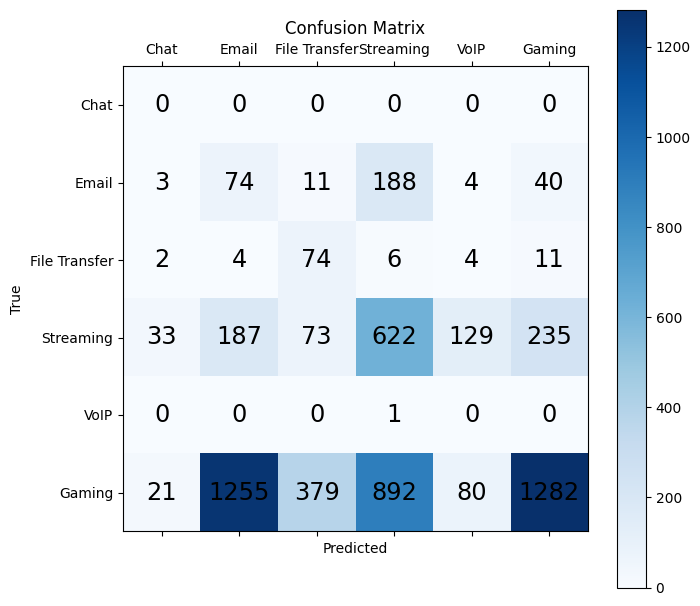

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0487    0.2313    0.0804       320
           2     0.1378    0.7327    0.2320       101
           3     0.3640    0.4863    0.4163      1279
           4     0.0000    0.0000    0.0000         1
           5     0.8176    0.3280    0.4681      3909

    accuracy                         0.3658      5610
   macro avg     0.2280    0.2964    0.1995      5610
weighted avg     0.6579    0.3658    0.4299      5610



C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_pred, y_test, digits=4))

# Store results
results_dictionary["LogisticRegression"] =  [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

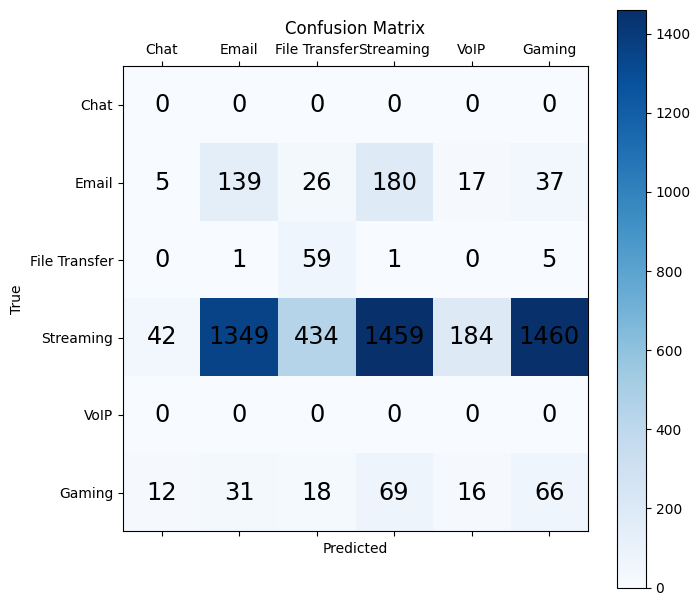

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0914    0.3441    0.1445       404
           2     0.1099    0.8939    0.1957        66
           3     0.8537    0.2961    0.4397      4928
           4     0.0000    0.0000    0.0000         0
           5     0.0421    0.3113    0.0742       212

    accuracy                         0.3071      5610
   macro avg     0.1829    0.3076    0.1423      5610
weighted avg     0.7594    0.3071    0.4017      5610



C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [39]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_pred, y_test, digits=4))

# Store results
results_dictionary["MultinomialNB"] =  [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

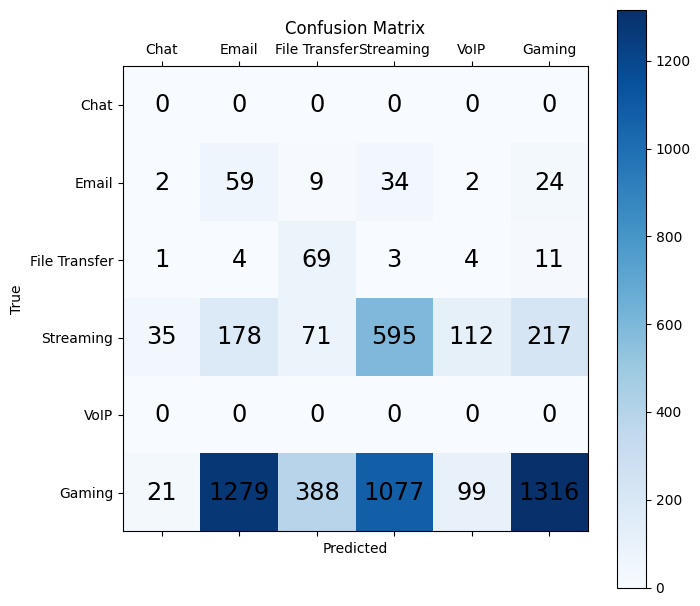

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0388    0.4538    0.0715       130
           2     0.1285    0.7500    0.2194        92
           3     0.3482    0.4925    0.4080      1208
           4     0.0000    0.0000    0.0000         0
           5     0.8393    0.3148    0.4579      4180

    accuracy                         0.3635      5610
   macro avg     0.2258    0.3352    0.1928      5610
weighted avg     0.7033    0.3635    0.4343      5610



C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wai Qun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [40]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Confusion matrix 
plot_cm(y_test, y_pred)

# Classification report
print(classification_report(y_pred, y_test, digits=4))

# Store results
results_dictionary["SVM"] =  [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted"), f1_score(y_test, y_pred, average="weighted")]

In [41]:
result_df = pd.DataFrame(results_dictionary, index=['accuracy', 'precision', 'recall', 'f1'])
result_df = result_df.T
result_df

,accuracy,precision,recall,f1
CNN,0.751337,0.756930,0.751337,0.747136
RandomForest,0.854545,0.850753,0.854545,0.850130
DecisionTree,0.829947,0.829261,0.829947,0.829348
AdaBoost,0.638681,0.624360,0.638681,0.625264
LogisticRegression,0.365775,0.372603,0.365775,0.301673
MultinomialNB,0.307130,0.355996,0.307130,0.212542
SVM,0.363458,0.432802,0.363458,0.292637
